<a href="https://colab.research.google.com/github/anishjoshi0949/EDA-Project/blob/main/22BDS0012.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [174]:
# Anish Nitin Joshi
# 22BDS0012
# C2 Slot

In [175]:
# Import all the important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [176]:
# Load the dataset directly from GitHub
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/covid-data.csv"
df = pd.read_csv(url)
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,24/02/2020,5,5,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,25/02/2020,5,0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,26/02/2020,5,0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,27/02/2020,5,0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,28/02/2020,5,0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5813,NGA,Africa,Nigeria,06/10/2022,265741,236,51.286,3155.0,0.0,0.0,...,0.6,10.8,41.949,NaN,54.69,0.539,NaN,NaN,NaN,NaN
5814,NGA,Africa,Nigeria,07/10/2022,265741,0,51.286,3155.0,0.0,0.0,...,0.6,10.8,41.949,NaN,54.69,0.539,NaN,NaN,NaN,NaN
5815,NGA,Africa,Nigeria,08/10/2022,265816,75,55.000,3155.0,0.0,0.0,...,0.6,10.8,41.949,NaN,54.69,0.539,NaN,NaN,NaN,NaN
5816,NGA,Africa,Nigeria,09/10/2022,265816,0,55.000,3155.0,0.0,0.0,...,0.6,10.8,41.949,NaN,54.69,0.539,NaN,NaN,NaN,NaN


In [177]:
# Dimensions
print("Dimensions (rows, columns): ", df.shape)

Dimensions (rows, columns):  (5818, 67)


In [178]:
# Summary Statistics
print("Data Types & Non-Null counts:\n")
print(df.info())

print("\nSummary Statistics (Numerical variables):\n")
print(df.describe())

Data Types & Non-Null counts:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5818 entries, 0 to 5817
Data columns (total 67 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   iso_code                                    5818 non-null   object 
 1   continent                                   5818 non-null   object 
 2   location                                    5818 non-null   object 
 3   date                                        5818 non-null   object 
 4   total_cases                                 5818 non-null   int64  
 5   new_cases                                   5818 non-null   int64  
 6   new_cases_smoothed                          5788 non-null   float64
 7   total_deaths                                5638 non-null   float64
 8   new_deaths                                  5627 non-null   float64
 9   new_deaths_smoothed                         5596 non-n

In [179]:
# Data Handling

In [180]:
# In the dataset that has been imported, the date column has the datatype object. So we need to convert it to datetime datatype

if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])

/tmp/ipython-input-952170937.py:4: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['date'])


In [181]:
# Change the remaining object dtypes to category like ISO_Code, Continent, Location

df['location'] = df['location'].astype('category')
df['continent'] = df['continent'].astype('category')
df['iso_code'] = df['iso_code'].astype('category')
df['tests_units'] = df['tests_units'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5818 entries, 0 to 5817
Data columns (total 67 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   iso_code                                    5818 non-null   category      
 1   continent                                   5818 non-null   category      
 2   location                                    5818 non-null   category      
 3   date                                        5818 non-null   datetime64[ns]
 4   total_cases                                 5818 non-null   int64         
 5   new_cases                                   5818 non-null   int64         
 6   new_cases_smoothed                          5788 non-null   float64       
 7   total_deaths                                5638 non-null   float64       
 8   new_deaths                                  5627 non-null   float64       
 9   new_deat

In [182]:
# Dropping the unnecessary Columns:
# weekly_icu_admissions, weekly_icu_admissions_per_million have 0 non null values so drop.

In [183]:
thresh=420 # The minimum number of non null values in the df are 421. Hence set the threshold to 421.
df.dropna(axis=1, thresh=thresh, inplace=True)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5818 entries, 0 to 5817
Data columns (total 65 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   iso_code                                    5818 non-null   category      
 1   continent                                   5818 non-null   category      
 2   location                                    5818 non-null   category      
 3   date                                        5818 non-null   datetime64[ns]
 4   total_cases                                 5818 non-null   int64         
 5   new_cases                                   5818 non-null   int64         
 6   new_cases_smoothed                          5788 non-null   float64       
 7   total_deaths                                5638 non-null   float64       
 8   new_deaths                                  5627 non-null   float64       
 9   new_deat

In [184]:
# Data Cleaning

In [185]:
# The total_deaths,new_deaths have to made accurate hence we need to replace all the null values with 0
df['total_deaths'] = df['total_deaths'].fillna(0)
df['new_deaths'] = df['new_deaths'].fillna(0)

# The smoothed column entry is actually the moving average of the 7 days. Hence we cannot make any use of them by any kind of filliing
# We also cannot remove them because the other data entried will be affected because of that.
# Hence, we will replace them with the value '0'
df['new_cases_smoothed'] = df['new_cases_smoothed'].fillna(0)
df['new_deaths_smoothed'] = df['new_deaths_smoothed'].fillna(0)

# Total Deaths/million column and new_deaths/million can be filled with backwardfill.
df['total_deaths_per_million'] = df['total_deaths_per_million'].fillna(method='bfill')
df['new_deaths_per_million'] = df['new_deaths_per_million'].fillna(method='bfill')


# Fill NaNs in "new_cases_smoothed_per_million" and "new_deaths_smoothed_per_million", and "reproduction_rate" with the column's mean
mean_cases_smoothed = df['new_cases_smoothed_per_million'].mean()
df['new_cases_smoothed_per_million'].fillna(mean_cases_smoothed, inplace=True)

mean_deaths_smoothed = df['new_deaths_smoothed_per_million'].mean()
df['new_deaths_smoothed_per_million'].fillna(mean_deaths_smoothed, inplace=True)

mean_reproduction_rate = df['reproduction_rate'].mean()
df['reproduction_rate'].fillna(mean_reproduction_rate, inplace=True)

/tmp/ipython-input-1579788248.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['total_deaths_per_million'] = df['total_deaths_per_million'].fillna(method='bfill')
/tmp/ipython-input-1579788248.py:13: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['new_deaths_per_million'] = df['new_deaths_per_million'].fillna(method='bfill')
/tmp/ipython-input-1579788248.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) inste

In [186]:
# Data Visualisation

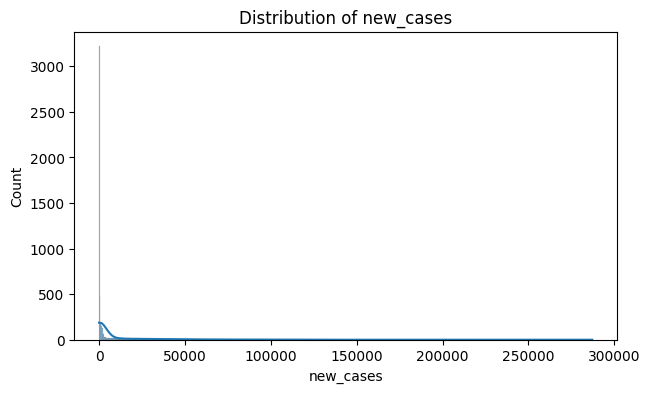

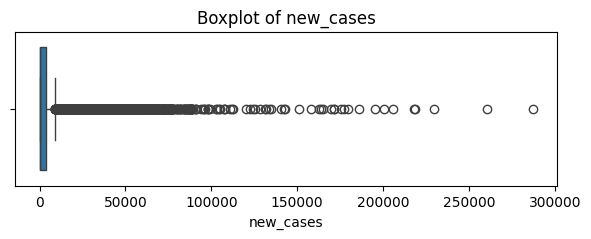

In [187]:
# Univariate Analysis of the Data

col = 'new_cases'  # you can change this to any numeric column

plt.figure(figsize=(7,4))
sns.histplot(df[col], kde=True)
plt.title(f"Distribution of {col}")
plt.show()

plt.figure(figsize=(7,2))
sns.boxplot(x=df[col])
plt.title(f"Boxplot of {col}")
plt.show()


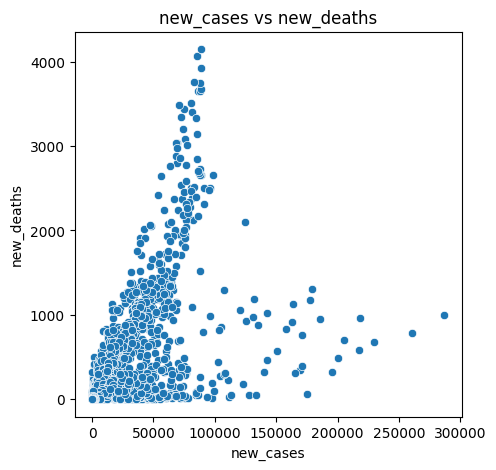

In [188]:
# Bivariate Analysis

xcol = 'new_cases'
ycol = 'new_deaths'

plt.figure(figsize=(5,5))
sns.scatterplot(x=xcol, y=ycol, data=df)
plt.title(f"{xcol} vs {ycol}")
plt.show()

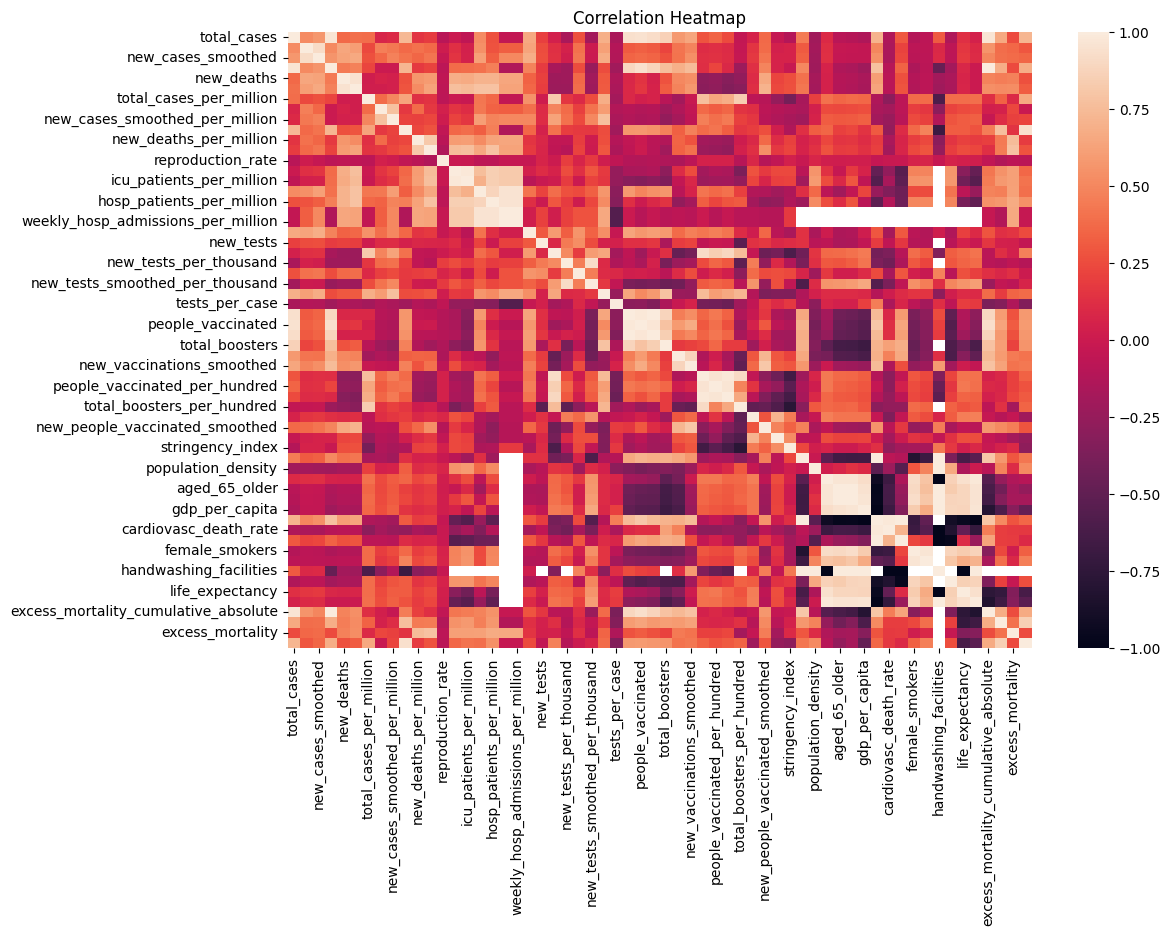

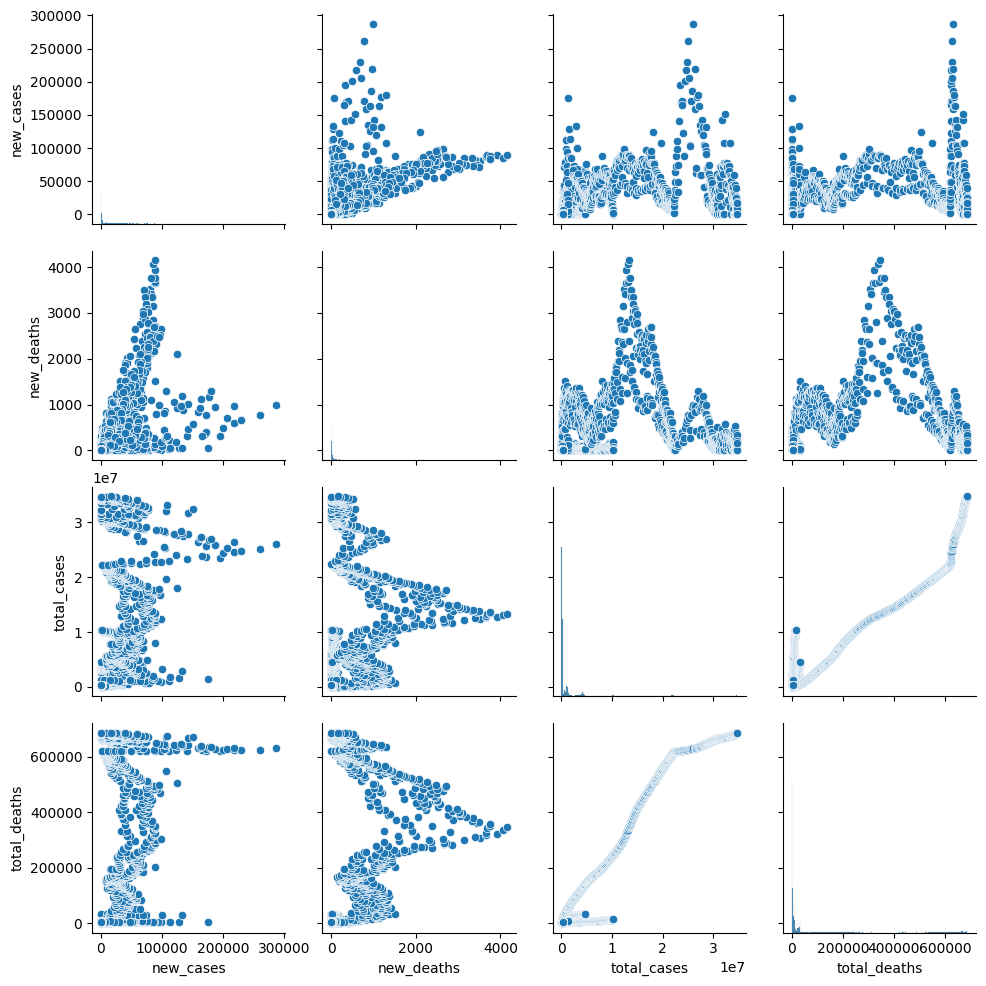

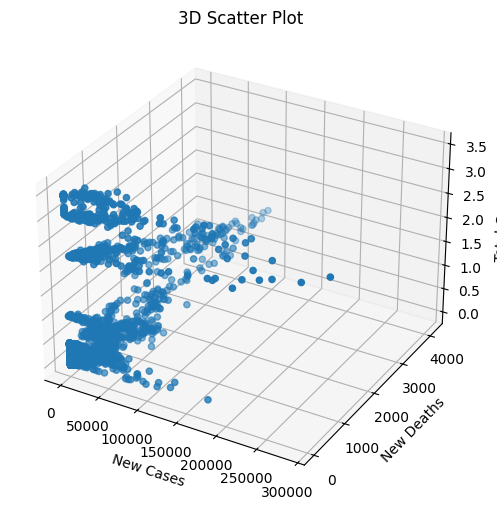

In [189]:
# Multivariate Analysis

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# (A) Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=False)
plt.title("Correlation Heatmap")
plt.show()


# (B) Pairplot (choose few important features)
sample_features = ['new_cases', 'new_deaths', 'total_cases', 'total_deaths']
sns.pairplot(df[sample_features])
plt.show()

# (C) 3D Scatter Plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

x = df['new_cases']
y = df['new_deaths']
z = df['total_cases']

ax.scatter(xs=x, ys=y, zs=z)
ax.set_xlabel('New Cases')
ax.set_ylabel('New Deaths')
ax.set_zlabel('Total Cases')
ax.set_title('3D Scatter Plot')
plt.show()

In [191]:
df.to_csv("file.csv", index=False)